In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
listings = pd.read_csv("../../cleaned/listings.csv")
calendar_summary = pd.read_csv("../../cleaned/calendar_summary.csv")
#legacy (local) directories not available on repo - wrangled/cleaned data uploaded to ivanachille.com/publicdata/Airbnb-Berlin-Analytics

In [3]:
listings

,listing_id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,instant_bookable,is_business_travel_ready,require_guest_phone_verification,require_guest_profile_picture
0,2015,2217,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,3.76,4,141,f,f,f,f
1,2695,2986,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,1.42,1,0,f,f,f,f
2,3176,3718,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,1.25,1,220,t,f,f,f
3,3309,4108,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,0.39,1,297,f,f,f,f
4,7071,17391,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,1.75,1,26,f,f,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,29856708,87555909,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,1,314,f,f,f,f
22540,29857108,67537363,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,6,78,t,f,f,f
22541,29864272,3146923,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,2,15,f,f,f,f
22542,29866805,36961901,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,3,6,f,f,f,f


(array([2.2451e+04, 5.1000e+01, 7.0000e+00, 1.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.00000e+00, 4.50950e+02, 9.00900e+02, 1.35085e+03, 1.80080e+03,
        2.25075e+03, 2.70070e+03, 3.15065e+03, 3.60060e+03, 4.05055e+03,
        4.50050e+03, 4.95045e+03, 5.40040e+03, 5.85035e+03, 6.30030e+03,
        6.75025e+03, 7.20020e+03, 7.65015e+03, 8.10010e+03, 8.55005e+03,
        9.00000e+03]),
 <a list of 20 Patch objects>)

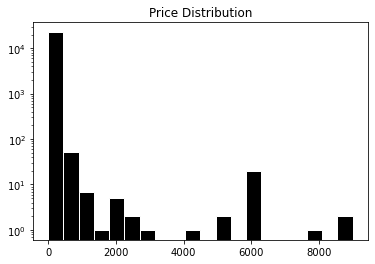

In [108]:
pricedata = listings['price']
plt.title("Price Distribution")
plt.hist(pricedata, color="black", bins=20, log=0.01, edgecolor="white")

In [5]:
pricedata.describe()

count    22544.000000
mean        67.167495
std        220.301658
min          1.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [12]:
listings["require_guest_profile_picture"].value_counts()

f    22388
t      156
Name: require_guest_profile_picture, dtype: int64

In [26]:
a = listings["room_type"].value_counts()
roomtypes_prop = np.array([a[0],a[1],a[2]])
print(a)
roomtypes_prop

Private room       11529
Entire home/apt    10719
Shared room          296
Name: room_type, dtype: int64


array([11529, 10719,   296])

<BarContainer object of 3 artists>

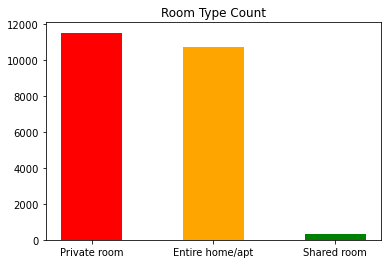

In [107]:
plt.title("Room Type Count")
plt.bar(["Private room", "Entire home/apt", "Shared room"],roomtypes_prop, color=['red','orange','green'], width=0.5)

In [44]:
listings["minimum_nights"].describe()

count    22544.000000
mean         7.158801
std         40.672178
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64

In [57]:
listings["minimum_nights"].describe()

count    22544.000000
mean         7.158801
std         40.672178
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64

In [55]:
listings.groupby(listings["room_type"]).mean()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.480889e+07,4.950696e+07,52.511071,13.404700,83.372236,10.453214,19.239854,1.102702,2.154865,92.065864
Private room,1.650580e+07,5.780534e+07,52.508518,13.407519,52.501865,4.183624,16.570908,1.159858,1.547055,67.622430
Shared room,1.764845e+07,7.111596e+07,52.515741,13.401349,51.564189,3.739865,16.756757,1.397626,7.743243,113.719595


In [65]:
listings.groupby(listings["room_type"])["minimum_nights"].median()

room_type
Entire home/apt    3
Private room       2
Shared room        1
Name: minimum_nights, dtype: int64

In [64]:
listings["room_type"].value_counts().index

RangeIndex(start=0, stop=22544, step=1)

<BarContainer object of 3 artists>

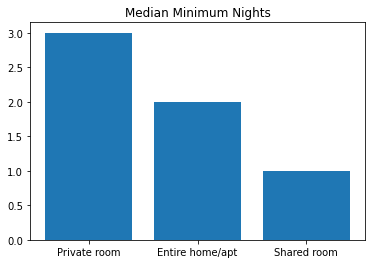

In [106]:
plt.title("Median Minimum Nights")
plt.bar(listings["room_type"].value_counts().index,listings.groupby(listings["room_type"])["minimum_nights"].median())

In [84]:
listings["min_spending"] = listings["minimum_nights"]*listings["price"]
#creation of minimum spending variable, important because this is the "true price" of renting that location

In [85]:
listings["price"].median()
#average price p/night

45.0

In [324]:
listings["min_spending"].median()
#means that on average, the minimum spending of a reservation is $120

120.0

In [87]:
print("MEDIAN PRICE PER NIGHT G/BY ROOMTYPE")
print(listings["price"].groupby(listings["room_type"]).median())

MEDIAN PRICE PER NIGHT G/BY ROOMTYPE
room_type
Entire home/apt    65
Private room       35
Shared room        25
Name: price, dtype: int64


In [88]:
print("MEDIAN MIN. SPENDING PER NIGHT G/BY ROOMTYPE")
print(listings["min_spending"].groupby(listings["room_type"]).median())

MEDIAN MIN. SPENDING PER NIGHT G/BY ROOMTYPE
room_type
Entire home/apt    220
Private room        80
Shared room         34
Name: min_spending, dtype: int64


In [99]:
roomtypes_medms_sorted = listings["min_spending"].groupby(listings["room_type"]).median().index

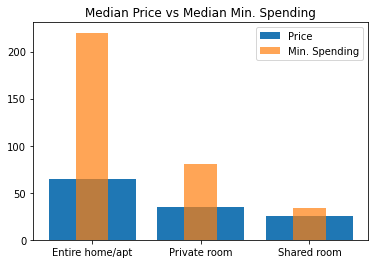

In [105]:
plt.title("Median Price vs Median Min. Spending")
plt.bar(roomtypes,listings["price"].groupby(listings["room_type"]).median(), label="Price", alpha=1)
plt.bar(roomtypes,listings["min_spending"].groupby(listings["room_type"]).median(), width=0.3, label="Min. Spending", alpha=0.7)
plt.legend()

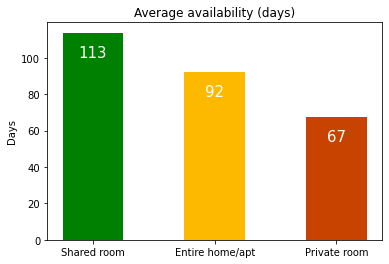

In [204]:
plt.title("Average availability (days)")
plt.ylabel("Days")
plt.bar(listings["availability_365"].sort_values(ascending=True).groupby(listings["room_type"]).mean().sort_values(ascending=False).index,
        listings["availability_365"].sort_values(ascending=True).groupby(listings["room_type"]).mean().sort_values(ascending=False), 
        color=["green","#fcb900","#c94300"], width=0.5,
       )

it = np.array(listings["availability_365"].sort_values(ascending=True).groupby(listings["room_type"]).mean().sort_values(ascending=False))
for i in range(3):
    plt.annotate(int(it[i]),(i,it[i]-15), ha='center', va='bottom', color="white", fontsize="15")


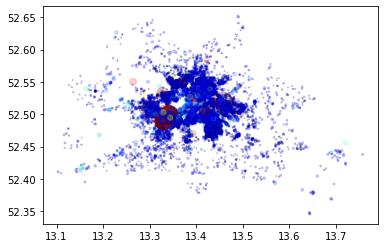

In [266]:
plt.imshow(im)
plt.scatter(listings["longitude"],listings["latitude"], c=listings["price"],cmap="jet", alpha=0.2,
           s=listings["price"]/20,vmin=0,vmax=1000)

In [299]:
listings["neighbourhood_group"].value_counts()

Friedrichshain-Kreuzberg    5493
Mitte                       4630
Pankow                      3540
Neukölln                    3499
Charlottenburg-Wilm.        1592
Tempelhof - Schöneberg      1559
Lichtenberg                  688
Treptow - Köpenick           595
Steglitz - Zehlendorf        437
Reinickendorf                247
Marzahn - Hellersdorf        140
Spandau                      124
Name: neighbourhood_group, dtype: int64

In [336]:
price_per_district = listings["price"].groupby(listings["neighbourhood_group"]).mean().sort_values(ascending=False)
price_per_district

neighbourhood_group
Charlottenburg-Wilm.        114.270729
Tempelhof - Schöneberg       96.634381
Mitte                        69.714471
Pankow                       67.841808
Friedrichshain-Kreuzberg     60.873111
Spandau                      58.233871
Marzahn - Hellersdorf        56.907143
Steglitz - Zehlendorf        56.327231
Lichtenberg                  56.113372
Treptow - Köpenick           52.216807
Reinickendorf                48.263158
Neukölln                     46.567305
Name: price, dtype: float64

The data tells us that Charlottenburg is the most expensive district in Berlin (for renting specifically in this dataset, but when rent prices are high, everything tends to be expensive) which we can confirm with a quick google research <b>"The Charlottenburg district is the wealthiest and most commercialized in western Berlin" <i>from frommers.com</i></b>

In [335]:
min_spending_per_district = listings["min_spending"].groupby(listings["neighbourhood_group"]).mean().sort_values(ascending=False)
min_spending_per_district

neighbourhood_group
Charlottenburg-Wilm.        1214.725503
Mitte                        807.045572
Spandau                      490.258065
Marzahn - Hellersdorf        476.028571
Pankow                       448.803107
Tempelhof - Schöneberg       415.806928
Reinickendorf                400.153846
Friedrichshain-Kreuzberg     368.492081
Lichtenberg                  349.707849
Steglitz - Zehlendorf        332.270023
Treptow - Köpenick           269.852101
Neukölln                     247.393827
Name: min_spending, dtype: float64

After checking the <b>mean minimum spending</b> compared to the <b>mean price</b>, we can see that, on average, though some districts rent prices are higher, others surpasses these in total renting cost because of the min. required nights

In [337]:
availability_per_district = listings["availability_365"].groupby(listings["neighbourhood_group"]).mean().sort_values(ascending=False)
availability_per_district

neighbourhood_group
Spandau                     195.564516
Marzahn - Hellersdorf       177.528571
Steglitz - Zehlendorf       125.457666
Charlottenburg-Wilm.        118.331030
Reinickendorf               117.935223
Tempelhof - Schöneberg       93.076331
Treptow - Köpenick           90.825210
Mitte                        85.147516
Pankow                       81.032203
Lichtenberg                  74.129360
Friedrichshain-Kreuzberg     66.505006
Neukölln                     52.056302
Name: availability_365, dtype: float64

Mean availability (days) grouped by district

In [374]:
rt_dummies = pd.get_dummies(listings["room_type"])
rt_dummies

,Entire home/apt,Private room,Shared room
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
22539,1,0,0
22540,0,0,1
22541,1,0,0
22542,0,1,0


In [379]:
rt_dt = rt_dummies.groupby(listings["neighbourhood_group"]).sum()

In [384]:
rt_dt

,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Charlottenburg-Wilm.,848.0,719.0,25.0
Friedrichshain-Kreuzberg,2474.0,2964.0,55.0
Lichtenberg,293.0,383.0,12.0
Marzahn - Hellersdorf,79.0,56.0,5.0
Mitte,2236.0,2287.0,107.0
Neukölln,1376.0,2099.0,24.0
Pankow,1987.0,1523.0,30.0
Reinickendorf,115.0,128.0,4.0
Spandau,72.0,48.0,4.0
